In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
star = cv2.imread("../opencv-np-workshop/data/img/star.jpg", 0) # Grayscale

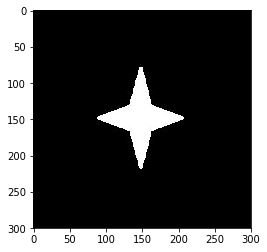

In [5]:
plt.imshow(star, cmap="gray")

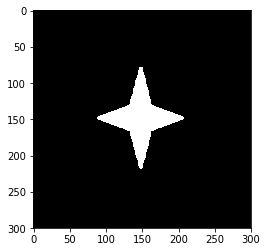

In [6]:
_, thresh = cv2.threshold(star, 127, 255, cv2.THRESH_BINARY)
plt.imshow(thresh, cmap="gray")

In [7]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [26]:
color_star = cv2.imread("../opencv-np-workshop/data/img/star.jpg") # Read in color

In [29]:
ctr = cv2.drawContours(color_star, contours, -1, (0,255,0), 3) 

# third parameter = which contours to return? -1 == all
# fourth parameter = BGR color
# fifth parameter = thickness (fill if negative)

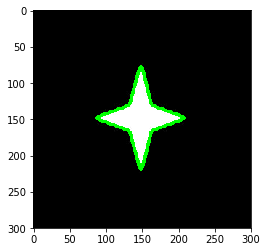

In [30]:
plt.imshow(ctr[:,:,::-1])

# Moments of the image

- Perimeter
- Area
- Centroid

In [31]:
moments = cv2.moments(contours[0])

In [32]:
moments

{'m00': 4503.0,
 'm10': 664599.6666666666,
 'm01': 666512.0,
 'm20': 100066439.83333333,
 'm11': 98370780.66666666,
 'm02': 101522757.83333333,
 'm30': 15352180819.900002,
 'm21': 14811396363.333334,
 'm12': 14984389252.3,
 'm03': 15876066320.0,
 'mu20': 1977895.100167796,
 'mu11': -6.148641645908356,
 'mu02': 2868916.8064623475,
 'mu30': -503925.003326416,
 'mu21': 53975.2755305171,
 'mu12': 604482.407225728,
 'mu03': -120960.93012046814,
 'nu20': 0.09754373044701989,
 'nu11': -3.0323218014591584e-07,
 'nu02': 0.1414861928829024,
 'nu30': -0.00037034888369586827,
 'nu21': 3.966797223386763e-05,
 'nu12': 0.00044425139306856115,
 'nu03': -8.889764378671183e-05}

### Important image points

In [34]:
area = moments['m00']
centroid = (moments['m10']/area,moments['m01']/area)

In [35]:
area

4503.0

In [36]:
centroid

(147.59042120068102, 148.01510104374861)

In [37]:
# Perimeter
perimeter = cv2.arcLength(contours[0], closed=True) # Calculates arc length
perimeter

444.19090580940247

### Calculate convexity - convex hull

In [39]:
hull = cv2.convexHull(contours[0])

In [40]:
hull

array([[[207, 149]],

       [[150, 217]],

       [[149, 218]],

       [[147, 218]],

       [[146, 217]],

       [[ 88, 149]],

       [[ 88, 147]],

       [[146,  79]],

       [[147,  78]],

       [[149,  78]],

       [[150,  79]],

       [[207, 147]]], dtype=int32)

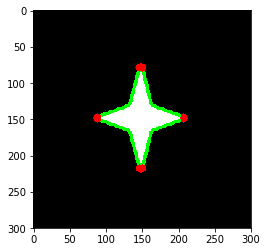

In [44]:
#### CHECK WHY I DONT GET WHAT I WANT
cvx_hull = cv2.polylines(color_star, hull, True, (0,0,255), 10) # True = is closed
plt.imshow(cvx_hull[:,:,::-1])

### Bounding rectangle

In [45]:
x, y, w, h = cv2.boundingRect(contours[0])

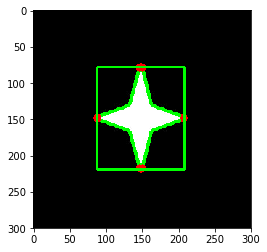

In [47]:
rect = cv2.rectangle(color_star, (x,y), (x+w,y+h), (0,255,0),2)
plt.imshow(rect[:,:,::-1])